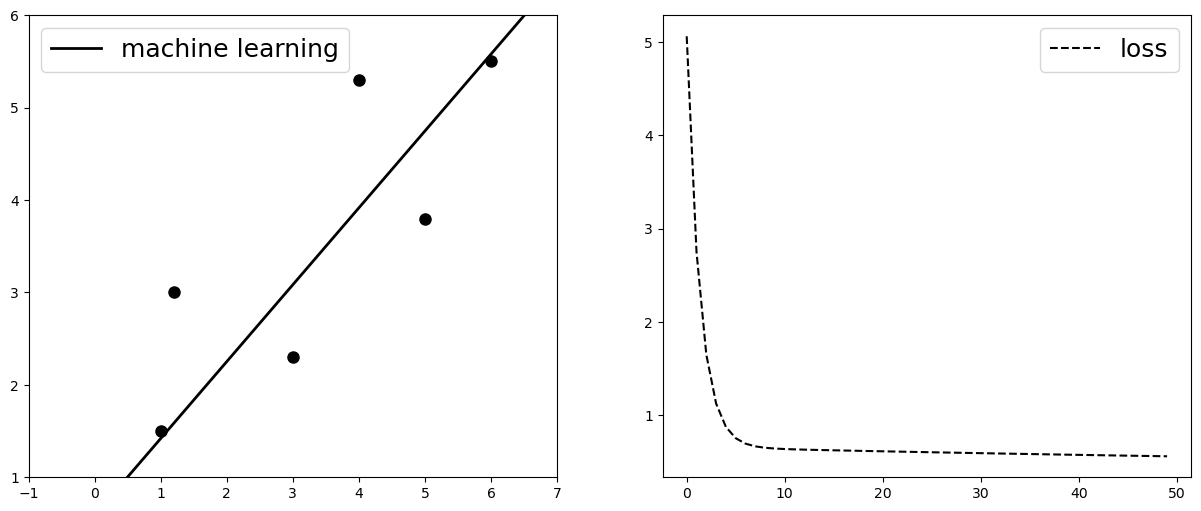

In [21]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],
              [1.5, 3, 2.3, 5.3, 3.8, 5.5]])

num_iters = 150 # iteration 횟수.
eta = 0.02

np.random.seed(2)
w = np.random.randn(2) # 아무렇게나 초기화합니다.
N = D1.shape[1]

ws, L = [], []

# 1열에는 숫자 1이 있고, 2열에는 데이터의 x좌표가 있는 행렬 X를 만듭니다.
# X: (N,2), y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선합니다.

for i in range(num_iters):
    # grad L
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y)
    # 안전장치 grad L을 이용해서 w를 수정합니다.
    w -= eta * c
    # w가 변화되는 과정을 저장합니다.
    ws.append(w)
    
    # 손실을 계산합니다.
    L.append( ((np.dot(X, w) - y)**2).sum()/(2*N) )

def f(x, w):
    return w[1] * x + w[0]
    
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)
plt.show()
